In [153]:
# É necessário antes de tudo instalar a biblioteca medmnist
# Importações necessárias
import numpy as np
from matplotlib import pyplot as plt
import os 
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## Importação da base de dados Breastmnist

In [110]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


In [111]:
# Importando o dataset breastmnist
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [112]:
# carregando os dados
train_dataset = DataClass(split='train', download=download)
val_dataset = DataClass(split='val', download=download)
test_dataset = DataClass(split='test', download=download)

Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz


In [113]:
print(train_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\Luis\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [114]:
print(val_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: C:\Users\Luis\.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [115]:
print(test_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: C:\Users\Luis\.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [116]:
# Separando os labels por conjuntos:
train_labels = train_dataset.labels
val_labels = val_dataset.labels
test_labels = test_dataset.labels

In [117]:
# Separando as images por conjuntos:
train_img = train_dataset.imgs
val_img = val_dataset.imgs
test_img = test_dataset.imgs

In [118]:
print(train_img.shape)
print(val_img.shape)
print(test_img.shape)

(546, 28, 28)
(78, 28, 28)
(156, 28, 28)


In [119]:
print(train_img[0].shape)

(28, 28)


Rótulo: [1]


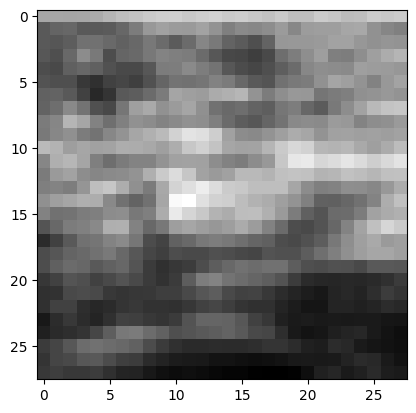

In [120]:
# Vizualização da primeira imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[0]}")
plt.imshow(train_img[0],cmap="gray")

Rótulo: [0]


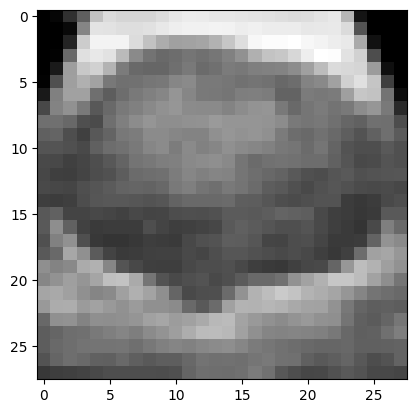

In [121]:
# Vizualização da quarta imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[4]}")
plt.imshow(train_img[4],cmap="gray")

## Análise do balanceamento das classes nos conjuntos disponíveis

In [169]:
# Conjunto de treino
num_negativas_t = (train_labels==0).sum()
num_positivas_t = (train_labels==1).sum()
p_negativas_t = num_negativas_t*100/len(train_labels)
p_positivas_t = num_positivas_t*100/len(train_labels)
print("No conjunto de treinamento há",num_negativas_t, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_t,"%")
print("No conjunto de treinamento há",num_positivas_t, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_t,"%")

No conjunto de treinamento há 147 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de treinamento há 399 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [170]:
# Conjunto de validação
num_negativas_v = (val_labels==0).sum()
num_positivas_v = (val_labels==1).sum()
p_negativas_v = num_negativas_v*100/len(val_labels)
p_positivas_v = num_positivas_v*100/len(val_labels)
print("No conjunto de validação há",num_negativas_v, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_v,"%")
print("No conjunto de validação há",num_positivas_v, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_v,"%")

No conjunto de validação há 21 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de validação há 57 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [171]:
# Conjunto de teste
num_negativas_tt = (test_labels==0).sum()
num_positivas_tt = (test_labels==1).sum()
p_negativas_tt = num_negativas_tt*100/len(test_labels)
p_positivas_tt = num_positivas_tt*100/len(test_labels)
print("No conjunto de teste há",num_negativas_tt, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_tt,"%")
print("No conjunto de teste há",num_positivas_tt, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_tt,"%")

No conjunto de teste há 42 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de teste há 114 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


## Regressão Logística e Validação Cruzada

In [172]:
# Preparando os dados para a regressão logística
# Foi transformando o array de matrizes em um único array de dimensão compatível com as labels
# Após essas transformações, cada linha dos conjuntos se refere a uma label
x_train=np.reshape(train_img,(len(train_labels),28*28))
x_val=np.reshape(val_img,(len(val_labels),28*28))
x_test=np.reshape(test_img,(len(test_labels),28*28))
y_train=train_labels
y_val=val_labels
y_test=test_labels
# Criando o conjunto validação+treino para uso posterior
x_tv=np.concatenate((x_train,x_val))
y_tv=np.concatenate((y_train,y_val))
print(x_train.shape)
print(x_train)
print(x_val.shape)
print(x_val)
print(x_test.shape)
print(x_test)
print(x_tv.shape)
print(x_tv)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_tv.shape)

(546, 784)
[[139 139 138 ...  51  42  40]
 [ 82  85  83 ...  26  22  19]
 [157 155 151 ...  77  79  72]
 ...
 [159 160 167 ...  50  55  56]
 [ 55  57  61 ...  14  15  15]
 [158 159 172 ...  20  21  20]]
(78, 784)
[[177 174 172 ...  27  32  33]
 [118 123 126 ...  14  14  14]
 [186 181 180 ...  22  20  20]
 ...
 [147 153 160 ...  76  66  55]
 [165 169 167 ...  21  25  27]
 [150 147 141 ...  19  19  19]]
(156, 784)
[[184 183 174 ...  15  18  20]
 [ 43  44  51 ...  12  12  11]
 [187 179 174 ...  46  42  41]
 ...
 [127 127 125 ...  23  24  24]
 [109 107 112 ...   1   1   1]
 [173 164 165 ...  17  18  19]]
(624, 784)
[[139 139 138 ...  51  42  40]
 [ 82  85  83 ...  26  22  19]
 [157 155 151 ...  77  79  72]
 ...
 [147 153 160 ...  76  66  55]
 [165 169 167 ...  21  25  27]
 [150 147 141 ...  19  19  19]]
(546, 1)
(78, 1)
(156, 1)
(624, 1)


In [173]:
# Reescalonando os dados das imagens dividindo pelo valor máximo do conjunto completo que é 255
x_train_n = x_train/255
x_val_n = x_val/255
x_test_n = x_test/255
x_tv_n = x_tv/255
print(x_train_n.shape)
print(x_val_n.shape)
print(x_test_n.shape)
print(x_tv_n.shape)

(546, 784)
(78, 784)
(156, 784)
(624, 784)


In [174]:
# Testando a Regressão Logística
# Como o dataset é pequeno, foi escolhido o solver liblinear 
# Foi escolhido 3000 como o número máximo de iterações, penalidade do tipo l2 com fator de regularização C de 1
lr = LogisticRegression(penalty='l2', C=1, class_weight='balanced', solver='liblinear', max_iter=3000)
lr.fit(x_train_n, y_train)
# Probabilidades estimadas
y_proba = lr.predict_proba(x_val_n)
# Acurácia média
score_train= lr.score(x_train_n, y_train)
score_val= lr.score(x_val_n, y_val)
score_test= lr.score(x_test_n, y_test)
print(y_proba)
print(y_proba.shape)
print(score_train)
print(score_val)
print(score_test)

[[0.05834878 0.94165122]
 [0.42038305 0.57961695]
 [0.32524313 0.67475687]
 [0.86714307 0.13285693]
 [0.46531428 0.53468572]
 [0.08908266 0.91091734]
 [0.07292876 0.92707124]
 [0.62444989 0.37555011]
 [0.0805747  0.9194253 ]
 [0.39020689 0.60979311]
 [0.28897765 0.71102235]
 [0.5200695  0.4799305 ]
 [0.33419819 0.66580181]
 [0.17997913 0.82002087]
 [0.59009362 0.40990638]
 [0.07877743 0.92122257]
 [0.34523132 0.65476868]
 [0.04077406 0.95922594]
 [0.39277575 0.60722425]
 [0.05610199 0.94389801]
 [0.92876562 0.07123438]
 [0.30365479 0.69634521]
 [0.32681273 0.67318727]
 [0.15225564 0.84774436]
 [0.09881965 0.90118035]
 [0.04982112 0.95017888]
 [0.32653061 0.67346939]
 [0.54257104 0.45742896]
 [0.97462006 0.02537994]
 [0.11660727 0.88339273]
 [0.46559369 0.53440631]
 [0.38329095 0.61670905]
 [0.02075876 0.97924124]
 [0.96764783 0.03235217]
 [0.06409812 0.93590188]
 [0.45777249 0.54222751]
 [0.02415066 0.97584934]
 [0.28463232 0.71536768]
 [0.37825575 0.62174425]
 [0.30178233 0.69821767]


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
# Validação Cruzada pelo GridSearchCV
# Foram fixados, dentre os parâmetros da Regressão Logística, apenas o solver como liblinear e as iterações maximas como 3000
# Tipo de regularização variando entre nenhuma, l1 e l2:
penalty_vector = ["none", "l1", "l2"]
# Valores inversos da força da regularização (valores menores representam regularizações maiores):
C_vector = [1000, 100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# Peso das classes variando entre balanceado e não balanceado:
c_weight_vector = ["balanced", None]
# dicionário dos parâmetros da regressão logística para a serem utilizados no GridSearchCV
dict_grid={'penalty':penalty_vector,'C':C_vector,'class_weight': c_weight_vector}
logreg = LogisticRegression(solver='liblinear', max_iter=3000)
# Foi escolhida a validação cruzada padrão do GridSearchCV que é kfold para 5 folds, será aplicada no conjunto treino+validação
# O parâmetro verbose printa mensagens 
CV = GridSearchCV(estimator=logreg, param_grid=dict_grid, cv=5, verbose=4)
CV_fit=CV.fit(x_tv_n,y_tv)
# Melhores parâmetros
CV_fit.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.736 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.768 total time=   1.6s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.792 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.752 total time=   1.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.798 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.792 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=None, penalty=l1;, score=0.776 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=None, penalty=l1;, score=0.792 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=None, penalty=l1;, score=0.784 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=None, penalty=l1;, score=0.728 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=None, penalty=l1;, score=0.815 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=None, penalty=l2;, score=0.744 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=None, penalty=l2;, score=0.776 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=None, penalty=l2;, score=0.784 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=None, penalty=l2;, score=0.744 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=None, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=balanced, penalty=l1;, score=0.760 total time=   2.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=balanced, penalty=l1;, score=0.728 total time=   2.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=balanced, penalty=l1;, score=0.816 total time=   2.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=balanced, penalty=l1;, score=0.760 total time=   1.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=balanced, penalty=l1;, score=0.798 total time=   2.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=balanced, penalty=l2;, score=0.784 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=balanced, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.8s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=None, penalty=l1;, score=0.800 total time=   0.8s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.7s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=None, penalty=l1;, score=0.798 total time=   0.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=None, penalty=l2;, score=0.760 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=None, penalty=l2;, score=0.784 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=None, penalty=l2;, score=0.768 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=None, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=None, penalty=l2;, score=0.798 total time=   0.1s
[CV 1/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, class_weight=balanced, penalty=l1;, score=0.760 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=balanced, penalty=l1;, score=0.736 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, class_weight=balanced, penalty=l1;, score=0.800 total time=   1.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=balanced, penalty=l1;, score=0.768 total time=   1.7s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, class_weight=balanced, penalty=l1;, score=0.790 total time=   1.4s
[CV 1/5] END C=10, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.1s
[CV 3/5] END C=10, class_weight=balanced, penalty=l2;, score=0.768 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.1s
[CV 5/5] END C=10, class_weight=balanced, penalty=l2;, score=0.790 total time=   0.1s
[CV 1/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, class_weight=None, penalty=l1;, score=0.768 total time=   0.6s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=None, penalty=l1;, score=0.736 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, class_weight=None, penalty=l1;, score=0.808 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=None, penalty=l1;, score=0.792 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, class_weight=None, penalty=l1;, score=0.790 total time=   0.6s
[CV 1/5] END C=10, class_weight=None, penalty=l2;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=None, penalty=l2;, score=0.776 total time=   0.1s
[CV 3/5] END C=10, class_weight=None, penalty=l2;, score=0.816 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=None, penalty=l2;, score=0.776 total time=   0.1s
[CV 5/5] END C=10, class_weight=None, penalty=l2;, score=0.790 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=balanced, penalty=l1;, score=0.768 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=l1;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, class_weight=balanced, penalty=l1;, score=0.744 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=l1;, score=0.752 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=l1;, score=0.750 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=l2;, score=0.806 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=None, penalty=l1;, score=0.824 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=l1;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=l1;, score=0.784 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, penalty=l1;, score=0.776 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=l1;, score=0.798 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 1/5] END C=1, class_weight=None, penalty=l2;, score=0.792 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=l2;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=l2;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1, class_weight=None, penalty=l2;, score=0.808 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=l2;, score=0.790 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.712 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.710 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.736 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.742 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=l1;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=l2;, score=0.824 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=l2;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.1, class_weight=None, penalty=l2;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=l2;, score=0.815 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.264 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=l1;, score=0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=0.01, class_weight=None, penalty=l1;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=None, penalty=l2;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalt

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.677 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weigh

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.001, class_weight=None, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced,

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.704 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.758 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, cla

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=0.0001, class_weight=None, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=bala

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 2/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.736 total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.758 total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=None, penalty=l1;, score=0.264 total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=None, penalty=l1;, score=0.272 total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=None, penalty=

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=1e-05, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estim

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [186]:
# Treinando com os parâmetros ótimos 'C': 0.1, 'class_weight': None, 'penalty': 'l2', solver liblinear (dataset pequeno)
lr_opt = LogisticRegression(penalty='l2', C=0.1, class_weight=None, solver='liblinear', max_iter=3000)
lr_opt.fit(x_tv_n, y_tv)
# Probabilidades estimadas
y_proba_train = lr_opt.predict_proba(x_tv_n)
y_proba_test = lr_opt.predict_proba(x_test_n)
# Acurácia média
score_tv= lr_opt.score(x_tv_n, y_tv)
score_test2= lr_opt.score(x_test_n, y_test)
print(y_proba_train)
print(y_proba_train.shape)
print(y_proba_test)
print(y_proba_test.shape)
print(score_tv)
print(score_test2)

[[0.0657544  0.9342456 ]
 [0.22731306 0.77268694]
 [0.07932261 0.92067739]
 ...
 [0.16784811 0.83215189]
 [0.4145325  0.5854675 ]
 [0.12831976 0.87168024]]
(624, 2)
[[0.44744294 0.55255706]
 [0.2875937  0.7124063 ]
 [0.05811407 0.94188593]
 [0.37368242 0.62631758]
 [0.15953958 0.84046042]
 [0.19893162 0.80106838]
 [0.83734854 0.16265146]
 [0.33702163 0.66297837]
 [0.13299321 0.86700679]
 [0.08462909 0.91537091]
 [0.53646249 0.46353751]
 [0.37476991 0.62523009]
 [0.40633478 0.59366522]
 [0.36463408 0.63536592]
 [0.14702659 0.85297341]
 [0.13201907 0.86798093]
 [0.22110103 0.77889897]
 [0.03176371 0.96823629]
 [0.06929806 0.93070194]
 [0.47684076 0.52315924]
 [0.63369678 0.36630322]
 [0.08979982 0.91020018]
 [0.12759258 0.87240742]
 [0.34255623 0.65744377]
 [0.60619247 0.39380753]
 [0.52742314 0.47257686]
 [0.58968621 0.41031379]
 [0.11958182 0.88041818]
 [0.11892963 0.88107037]
 [0.02074571 0.97925429]
 [0.20315814 0.79684186]
 [0.05877681 0.94122319]
 [0.04558297 0.95441703]
 [0.144656

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
# previsão para o conjunto de teste
y_pred_test = lr_opt.predict(x_test_n)

## Métricas de desempenho

- Matriz de Confusão

array([[ 16,  26],
       [  5, 109]], dtype=int64)

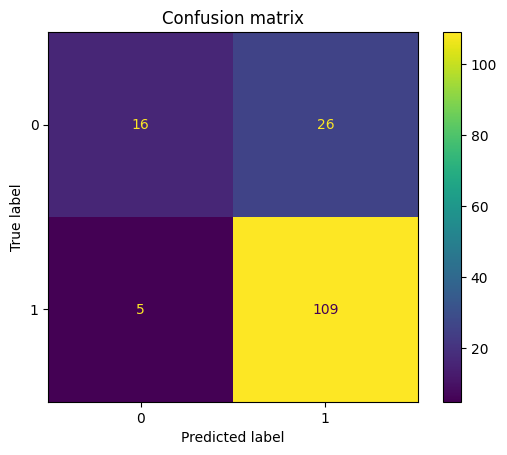

In [194]:
cm=metrics.confusion_matrix(y_test, y_pred_test)
display(cm)
cm_fig=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_opt.classes_)
cm_fig.plot()
plt.title('Confusion matrix')
plt.show()

- Acurácia

In [189]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("O valor da acurácia é",accuracy)
print("O classificador obteve boa taxa de acerto.")

O valor da acurácia é 0.8012820512820513
O classificador obteve boa taxa de acerto.


- F1-Medida

In [190]:
F1 = metrics.f1_score(y_test, y_pred_test)
print("O valor da F1-Medida é",F1)
print("O classificador obteve bons resultados tanto na precisão quanto no recall.")

O valor da F1-Medida é 0.8755020080321286
O classificador obteve bons resultados tanto na precisão quanto no recall.


- Acurácia Balanceada

In [191]:
a_b = metrics.balanced_accuracy_score(y_test, y_pred_test)
print("O valor da acurácia balanceada é",a_b)
print("Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.")

O valor da acurácia balanceada é 0.668546365914787
Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.


- Curva ROC

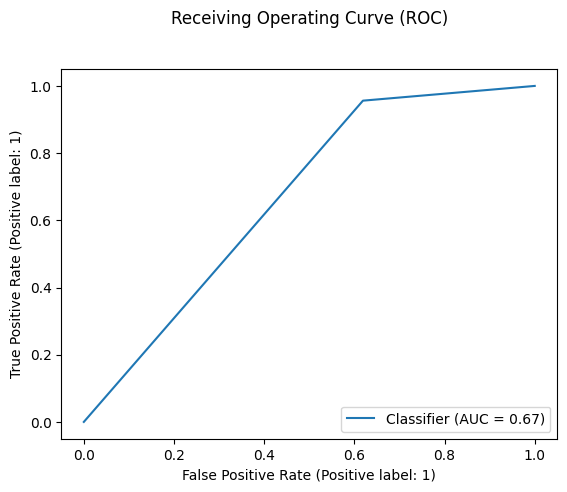

In [192]:
ROC = metrics.RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.title('Receiving Operating Curve (ROC)', y=1.1)
plt.show()

## Classificação por KNN

In [167]:
# Validação cruzada variando o número de vizinhos, os tipos de pesos e as métricas de distância
# Número de vizinhos a serem testados(de 1 vizinho até 50 vizinhos):
n_vector=[]
for i in range(1,51,1):
    n_vector.append(int(i))
# tipos de pesos a serem testados
weights_vector = ["uniform", "distance"]
# Métricas de distância a serem testadas
# p=1 usa a distância de Manhattan e p=2 usa a distância de Euclidiana, com metric=minkowski
p_vector = [1,2]
# dicionário de parâmtros
KNN_grid={'n_neighbors':n_vector,'weights':weights_vector,'p': p_vector}
KNN= KNeighborsClassifier(metric='minkowski')
# Validação cruzada pelo GridSearch com 5 folds
CV_KNN = GridSearchCV(estimator=KNN, param_grid=KNN_grid, cv=5, verbose=3)
CV_KNN_fit=CV_KNN.fit(x_tv_n,y_tv)
# Melhores parâmetros
CV_KNN_fit.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.808 total time=   0.2s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.680 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.839 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.680 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.839 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=2, weights=uniform;, score=0.855 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=2, weights=distance;, score=0.855 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.688 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.718 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.680 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.839 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=2, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=2, weights=uniform;, score=0.720 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=2, p=2, weights=uniform;, score=0.710 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=2, weights=distance;, score=0.855 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.744 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.704 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.752 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.728 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.855 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=2, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=3, p=2, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=1, weights=uniform;, score=0.688 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=1, weights=uniform;, score=0.744 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=1, weights=uniform;, score=0.710 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=1, weights=distance;, score=0.688 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=4, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=1, weights=distance;, score=0.847 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=2, weights=uniform;, score=0.742 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=2, weights=distance;, score=0.720 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=4, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=2, weights=distance;, score=0.839 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.760 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=2, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=2, weights=distance;, score=0.839 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=6, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=1, weights=uniform;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=1, weights=uniform;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=6, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=6, p=1, weights=distance;, score=0.847 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=2, weights=uniform;, score=0.750 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=2, weights=distance;, score=0.839 total time=   0.0s
[CV 1/5] END n_neighbors=7, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=7, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=7, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=7, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=7, p=1, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=7, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 3/5] END n_neighbors=7, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=7, p=1, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END n_neighbors=7, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=7, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=7, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=7, p=2, weights=uniform;, score=0.760 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=7, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=7, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=7, p=2, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=7, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=7, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=7, p=2, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=1, weights=uniform;, score=0.752 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=1, weights=uniform;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=8, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=8, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=1, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=2, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=8, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=2, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=8, p=2, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=8, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=2, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=1, weights=uniform;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=9, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=1, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=9, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=1, weights=distance;, score=0.815 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=2, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=9, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=9, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=2, weights=distance;, score=0.815 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=10, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=10, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=10, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=10, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=10, p=1, weights=uniform;, score=0.774 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=10, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=10, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END n_neighbors=10, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=10, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=10, p=1, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END n_neighbors=10, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=10, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=10, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=10, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=10, p=2, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=10, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=10, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=10, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=10, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 5/5] END n_neighbors=10, p=2, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END n_neighbors=11, p=1, weights=uniform;, score=0.784 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=11, p=1, weights=uniform;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=11, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=11, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=11, p=1, weights=distance;, score=0.824 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=11, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 3/5] END n_neighbors=11, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=11, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=11, p=1, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=11, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=11, p=2, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=11, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=11, p=2, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=11, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=11, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=11, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=11, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=12, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=12, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=12, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=12, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=12, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=12, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=12, p=1, weights=distance;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=12, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=12, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=12, p=1, weights=distance;, score=0.839 total time=   0.0s
[CV 1/5] END n_neighbors=12, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=12, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=12, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=12, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=12, p=2, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=12, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=12, p=2, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=12, p=2, weights=distance;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=12, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=12, p=2, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=13, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=13, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=13, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=13, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=13, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 3/5] END n_neighbors=13, p=1, weights=distance;, score=0.824 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=13, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=13, p=1, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=13, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=13, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=13, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=13, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=13, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=13, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=13, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=13, p=2, weights=distance;, score=0.806 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=14, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=14, p=1, weights=uniform;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=14, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=14, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=14, p=1, weights=uniform;, score=0.798 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=14, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=14, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 3/5] END n_neighbors=14, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=14, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=14, p=1, weights=distance;, score=0.823 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=14, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=14, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=14, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=14, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=14, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=14, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=14, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 3/5] END n_neighbors=14, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=14, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=14, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=1, weights=uniform;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=15, p=1, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=15, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=2, weights=uniform;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=15, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=16, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=16, p=1, weights=uniform;, score=0.736 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=16, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=16, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=16, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=16, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=16, p=1, weights=distance;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=16, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=16, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=16, p=1, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=16, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=16, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=16, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=16, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=16, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=16, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=16, p=2, weights=distance;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=16, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=16, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=16, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=17, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=17, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=17, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=17, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=17, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=17, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=17, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=17, p=1, weights=distance;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=17, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=17, p=1, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=17, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=17, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=17, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=17, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=17, p=2, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=17, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=17, p=2, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=17, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=17, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=17, p=2, weights=distance;, score=0.782 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=18, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=18, p=1, weights=uniform;, score=0.774 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=18, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=18, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=18, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=18, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=18, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=2, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=18, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=19, p=1, weights=uniform;, score=0.768 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=19, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=19, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=19, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=19, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=19, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=19, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=19, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=19, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=19, p=1, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=19, p=2, weights=uniform;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=19, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=19, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=19, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=19, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=19, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=19, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=19, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=19, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=19, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=20, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=20, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=20, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=20, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=20, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=20, p=1, weights=distance;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=20, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=20, p=1, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=20, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=20, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=20, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=20, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=20, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=20, p=2, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=20, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=20, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=20, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=20, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=20, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=20, p=2, weights=distance;, score=0.815 total time=   0.0s
[CV 1/5] END n_neighbors=21, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=21, p=1, weights=uniform;, score=0.720 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=21, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=21, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=21, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=21, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=21, p=1, weights=distance;, score=0.752 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=21, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=21, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=21, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=21, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=21, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=21, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=21, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=21, p=2, weights=uniform;, score=0.806 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=21, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=21, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=21, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=21, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=21, p=2, weights=distance;, score=0.815 total time=   0.0s
[CV 1/5] END n_neighbors=22, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=22, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=22, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=22, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=22, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=22, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 2/5] END n_neighbors=22, p=1, weights=distance;, score=0.752 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=22, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=22, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=22, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=22, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=22, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=22, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=22, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=22, p=2, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=22, p=2, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=22, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=22, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=22, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=22, p=2, weights=distance;, score=0.823 total time=   0.0s
[CV 1/5] END n_neighbors=23, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=23, p=1, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=23, p=1, weights=uniform;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=23, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=23, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=23, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=23, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=23, p=1, weights=distance;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=23, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=23, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=23, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=23, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=23, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=23, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=23, p=2, weights=uniform;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=23, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=23, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=23, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=23, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=23, p=2, weights=distance;, score=0.815 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=24, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=24, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=24, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=1, weights=uniform;, score=0.766 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=24, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 3/5] END n_neighbors=24, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=24, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=24, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=24, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=24, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=24, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=2, weights=distance;, score=0.744 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=25, p=1, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=25, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=25, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=25, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=25, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=25, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=25, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=25, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 5/5] END n_neighbors=25, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=25, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=25, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=25, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=25, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=25, p=2, weights=uniform;, score=0.774 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=25, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=25, p=2, weights=distance;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=25, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=25, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=25, p=2, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=26, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=26, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=26, p=1, weights=uniform;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=26, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=26, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=26, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=26, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=26, p=1, weights=distance;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=26, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 5/5] END n_neighbors=26, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=26, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=26, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=26, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=26, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=26, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=26, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=26, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=26, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=26, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=26, p=2, weights=distance;, score=0.798 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=27, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=27, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=27, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=27, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=27, p=1, weights=uniform;, score=0.758 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=27, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=27, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=27, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=27, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=27, p=1, weights=distance;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=27, p=2, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=27, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=27, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=27, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=27, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=27, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=27, p=2, weights=distance;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=27, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=27, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=27, p=2, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=28, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=28, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=28, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=28, p=1, weights=uniform;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=28, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=28, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=28, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=28, p=1, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=28, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 5/5] END n_neighbors=28, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=28, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=28, p=2, weights=uniform;, score=0.688 total time=   0.0s
[CV 3/5] END n_neighbors=28, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=28, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=28, p=2, weights=uniform;, score=0.790 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=28, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=28, p=2, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=28, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=28, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=28, p=2, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=29, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=29, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=2, weights=uniform;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=29, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=2, weights=distance;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=2, weights=distance;, score=0.832 total time=   0.0s
[CV 4/5] END n_neighbors=29, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=2, weights=distance;, score=0.790 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=30, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=30, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=30, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=30, p=1, weights=uniform;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=30, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=30, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=30, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=30, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=30, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=30, p=1, weights=distance;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=30, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=30, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=30, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=30, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=30, p=2, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=30, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=30, p=2, weights=distance;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=30, p=2, weights=distance;, score=0.824 total time=   0.0s
[CV 4/5] END n_neighbors=30, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=30, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=31, p=1, weights=uniform;, score=0.776 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=31, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=31, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=31, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=31, p=1, weights=uniform;, score=0.774 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=31, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=31, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=31, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=31, p=1, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=31, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=31, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=31, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=31, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=31, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=31, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=31, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=31, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=31, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=31, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=31, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=32, p=1, weights=uniform;, score=0.768 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=32, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=32, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=32, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=32, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=32, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=32, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=32, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=32, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=32, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=32, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=32, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=32, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=32, p=2, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=32, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=32, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=32, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=32, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=32, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=32, p=2, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=33, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=33, p=1, weights=uniform;, score=0.728 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=33, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=33, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=33, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=33, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=33, p=1, weights=distance;, score=0.752 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=33, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=33, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=33, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=33, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=33, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=33, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=33, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 5/5] END n_neighbors=33, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=33, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=33, p=2, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=33, p=2, weights=distance;, score=0.808 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=33, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=33, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=34, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=34, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=34, p=1, weights=uniform;, score=0.760 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=34, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=34, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=34, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=34, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=34, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=34, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=34, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=34, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=34, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=34, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=34, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 5/5] END n_neighbors=34, p=2, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=34, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=34, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=34, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=34, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=34, p=2, weights=distance;, score=0.782 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=35, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=35, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=1, weights=uniform;, score=0.758 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=35, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=35, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=35, p=2, weights=uniform;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=35, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=35, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=35, p=2, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=36, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=36, p=1, weights=uniform;, score=0.720 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=36, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=36, p=1, weights=uniform;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=36, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=36, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=36, p=1, weights=distance;, score=0.760 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=36, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=36, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=36, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=36, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=36, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=36, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=36, p=2, weights=uniform;, score=0.752 total time=   0.0s
[CV 5/5] END n_neighbors=36, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=36, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=36, p=2, weights=distance;, score=0.712 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=36, p=2, weights=distance;, score=0.816 total time=   0.0s
[CV 4/5] END n_neighbors=36, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=36, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=37, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=37, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=37, p=1, weights=uniform;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=37, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=37, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 1/5] END n_neighbors=37, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=37, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=37, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=37, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/5] END n_neighbors=37, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=37, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=37, p=2, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END n_neighbors=37, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=37, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=37, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=37, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=37, p=2, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=37, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=37, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=37, p=2, weights=distance;, score=0.798 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=38, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=38, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=38, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=38, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=38, p=1, weights=uniform;, score=0.758 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=38, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=38, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END n_neighbors=38, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=38, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END n_neighbors=38, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=38, p=2, weights=uniform;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=38, p=2, weights=uniform;, score=0.696 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=38, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=38, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=38, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=38, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END n_neighbors=38, p=2, weights=distance;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=38, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=38, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=38, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=39, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=39, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=39, p=1, weights=uniform;, score=0.752 total time=   0.0s
[CV 4/5] END n_neighbors=39, p=1, weights=uniform;, score=0.760 total time=   0.0s

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=39, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=39, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=39, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=39, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=39, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=39, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=39, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=39, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=39, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=39, p=2, weights=distance;, score=0.728 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=39, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=39, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=39, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=1, weights=uniform;, score=0.752 total time=   0.0s
[CV 4/5] END n_neighbors=40, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=1, weights=distance;, score=0.792 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=40, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=40, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=40, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=2, weights=distance;, score=0.798 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=41, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=41, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=41, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=41, p=1, weights=uniform;, score=0.768 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=41, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=41, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=41, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=41, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=41, p=1, weights=distance;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=41, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=41, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=41, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=41, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=41, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=41, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=41, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=41, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=41, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=41, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=41, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=42, p=1, weights=uniform;, score=0.784 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=42, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=42, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=42, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=42, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=42, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=42, p=1, weights=distance;, score=0.752 total time=   0.0s
[CV 3/5] END n_neighbors=42, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=42, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=42, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=42, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=42, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=42, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=42, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=42, p=2, weights=uniform;, score=0.782 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=42, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=42, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=42, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=42, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=42, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=43, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=43, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=43, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=43, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=43, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=43, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=43, p=1, weights=distance;, score=0.744 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=43, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END n_neighbors=43, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 5/5] END n_neighbors=43, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=43, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=43, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=43, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=43, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=43, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=43, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=43, p=2, weights=distance;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=43, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=43, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=43, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=44, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=44, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=44, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=44, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=44, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=44, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=44, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=44, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=44, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=44, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=44, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=44, p=2, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=44, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=44, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=44, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=44, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=44, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=44, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 4/5] END n_neighbors=44, p=2, weights=distance;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=44, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=45, p=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=45, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=45, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=45, p=1, weights=uniform;, score=0.760 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=45, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=45, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=45, p=1, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=45, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=45, p=1, weights=distance;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 5/5] END n_neighbors=45, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=45, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=45, p=2, weights=uniform;, score=0.712 total time=   0.0s
[CV 3/5] END n_neighbors=45, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=45, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=45, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=45, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=45, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=45, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=45, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=45, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=1, weights=uniform;, score=0.776 total time=   0.0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=46, p=1, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=1, weights=distance;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=46, p=1, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=46, p=2, weights=uniform;, score=0.720 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=46, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=46, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=2, weights=distance;, score=0.784 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=47, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=47, p=1, weights=uniform;, score=0.736 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=47, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=47, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=47, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=47, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=47, p=1, weights=distance;, score=0.736 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=47, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=47, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=47, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=47, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=47, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=47, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=47, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=47, p=2, weights=uniform;, score=0.782 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=47, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END n_neighbors=47, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=47, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=47, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=47, p=2, weights=distance;, score=0.806 total time=   0.0s
[CV 1/5] END n_neighbors=48, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=48, p=1, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=48, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=48, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=48, p=1, weights=uniform;, score=0.774 total time=   0.0s
[CV 1/5] END n_neighbors=48, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=48, p=1, weights=distance;, score=0.744 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 3/5] END n_neighbors=48, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=48, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=48, p=1, weights=distance;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=48, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=48, p=2, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=48, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END n_neighbors=48, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=48, p=2, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=48, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=48, p=2, weights=distance;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=48, p=2, weights=distance;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=48, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=48, p=2, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=49, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=49, p=1, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=49, p=1, weights=uniform;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=49, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=49, p=1, weights=uniform;, score=0.782 total time=   0.0s
[CV 1/5] END n_neighbors=49, p=1, weights=distance;, score=0.784 total time=   0.0s
[CV 2/5] END n_neighbors=49, p=1, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=49, p=1, weights=distance;, score=0.800 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 4/5] END n_neighbors=49, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=49, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=49, p=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=49, p=2, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=49, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=49, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=49, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=49, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=49, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END n_neighbors=49, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=49, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=49, p=2, weights=distance;, score=0.815 total time=   0.

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=50, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END n_neighbors=50, p=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 3/5] END n_neighbors=50, p=1, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=50, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END n_neighbors=50, p=1, weights=uniform;, score=0.774 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 1/5] END n_neighbors=50, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END n_neighbors=50, p=1, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=50, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 4/5] END n_neighbors=50, p=1, weights=distance;, score=0.792 total time=   0.0s
[CV 5/5] END n_neighbors=50, p=1, weights=distance;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=50, p=2, weights=uniform;, score=0.776 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

[CV 2/5] END n_neighbors=50, p=2, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=50, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END n_neighbors=50, p=2, weights=uniform;, score=0.760 total time=   0.0s
[CV 5/5] END n_neighbors=50, p=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 1/5] END n_neighbors=50, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END n_neighbors=50, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=50, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END n_neighbors=50, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END n_neighbors=50, p=2, weights=distance;, score=0.806 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConv

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [184]:
# Treinando com os parâmetros ótimos 'n_neighbors': 10, 'p': 1, 'weights': 'distance', metric=minkowski para os dados de validação e treino juntos
KNN_opt = KNeighborsClassifier(n_neighbors=10, weights = 'distance', p=1, metric='minkowski')
KNN_opt.fit(x_tv_n, y_tv)
# Acurácia média
score_tv_knn= KNN_opt.score(x_tv_n, y_tv)
score_test_knn= KNN_opt.score(x_test_n, y_test)
print(score_tv_knn)
print(score_test_knn)

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0
0.7948717948717948


In [195]:
# previsão para o conjunto de teste
y_pred_test_knn = KNN_opt.predict(x_test_n)

## Métricas de desempenho

- Matriz de confusão

array([[ 17,  25],
       [  7, 107]], dtype=int64)

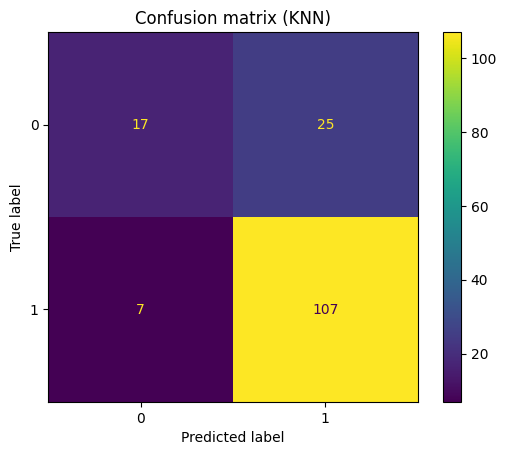

In [197]:
cm_knn=metrics.confusion_matrix(y_test, y_pred_test_knn)
display(cm_knn)
cm_fig_knn=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=KNN_opt.classes_)
cm_fig_knn.plot()
plt.title('Confusion matrix (KNN)')
plt.show()

- Acurácia

In [198]:
accuracy_knn = metrics.accuracy_score(y_test, y_pred_test_knn)
print("O valor da acurácia é",accuracy_knn)
print("O classificador obteve boa taxa de acerto.")

O valor da acurácia é 0.7948717948717948
O classificador obteve boa taxa de acerto.


- F1-Medida

In [199]:
F1_knn = metrics.f1_score(y_test, y_pred_test_knn)
print("O valor da F1-Medida é",F1_knn)
print("O classificador obteve bons resultados tanto na precisão quanto no recall.")

O valor da F1-Medida é 0.8699186991869918
O classificador obteve bons resultados tanto na precisão quanto no recall.


- Acurácia balanceada

In [200]:
a_b_knn = metrics.balanced_accuracy_score(y_test, y_pred_test_knn)
print("O valor da acurácia balanceada é",a_b_knn)
print("Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.")

O valor da acurácia balanceada é 0.6716791979949874
Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.
